## Observations and Insights 

Observations from the data:

1. Using the average of all tumor volumes (across all timepoints) may lead to misleading results.  To increase certainty in the efficacy of a drug regimen, it is better to use only the final tumor volume (as compared to the original volume) for each mouse in order to be sure that the drug regimen actually decreased the tumor volume over time.  For instance, the summary statistics table (which used the median of all volumes) indicates that the median tumor volumes of Capomulin and Infubinal were 41 mm3 and 51 mm3, respectively.  However, the box and whisker plot (which used only the final tumor volumes) found that the median value for Capomulin was approximately 38 mm3, and the median value for Infubinal was approximately 61 mm3, indicating that the efficacy of Infubinal may be lower than initially indicated.
2. Capomulin and Ramicane are much more effective drug regimens than Infubinal and Ceftamin.  It can be seen in the box and whisker plot that the median final tumor volumes for Capomulin and Ramicane were lower (at approximately 38 mm3) than the median final tumor volumes of Infubinal and Ceftamin (at approximately 61 mm3).  Although more data is needed to confirm for only final tumor volumes, the variance in data for Ramicane is slightly lower than that of Capomulin, indicating that the treatment method may deliver slightly more consistent results.
3. There is a fairly high positive correlation between mouse weight and average tumor volume for mice treated with Capomulin.  A correlation coefficient of 0.84 indicates that as the mouse weight increases, the average tumor volume of the mouse will also increase.  The slope of the linear regression line indicates that the average tumor volume of the mouse will increase 0.95 mm3 for every 1 g increase in the weight of the mouse.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
mice = combined['Mouse ID'].nunique()
print(mice)

249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined[combined.duplicated(['Mouse ID','Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = duplicate_rows['Mouse ID'].unique()
for mouse in duplicate_mice:
    all_dup_data = combined.loc[(combined["Mouse ID"] == mouse), :]
all_dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = combined
for mouse in duplicate_mice:
    combined_clean = combined_clean.loc[(combined["Mouse ID"] != mouse), :]
combined_clean.reset_index(drop = True, inplace = True)
combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = combined_clean["Mouse ID"].nunique()
print(clean_mice)

248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_regimen = combined_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
tumor_mean = tumor_regimen.mean()
tumor_median = tumor_regimen.median()
tumor_variance = tumor_regimen.var()
tumor_stdev = tumor_regimen.std()
tumor_sem = tumor_regimen.sem()
summary_dict = {"Mean": tumor_mean,
                "Median": tumor_median,
                "Variance": tumor_variance,
                "St. Dev.": tumor_stdev,
                "SEM": tumor_sem}
summary_df = pd.DataFrame(summary_dict)
summary_df['Mean'] = summary_df['Mean'].map("{:.2f}".format)
summary_df['Median'] = summary_df['Median'].map("{:.2f}".format)
summary_df['Variance'] = summary_df['Variance'].map("{:.3f}".format)
summary_df['St. Dev.'] = summary_df['St. Dev.'].map("{:.3f}".format)
summary_df['SEM'] = summary_df['SEM'].map("{:.3f}".format)
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.948,4.995,0.329
Ceftamin,52.59,51.78,39.290,6.268,0.470
Infubinol,52.88,51.82,43.129,6.567,0.492
Ketapril,55.24,53.70,68.554,8.280,0.604
Naftisol,54.33,52.51,66.173,8.135,0.596
Placebo,54.03,52.29,61.168,7.821,0.581
Propriva,52.32,50.45,43.852,6.622,0.544
Ramicane,40.22,40.67,23.487,4.846,0.321
Stelasyn,54.23,52.43,59.451,7.710,0.573


## Bar Plots

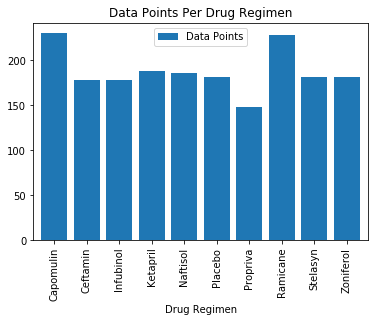

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen = combined_clean.groupby(['Drug Regimen'])
y_values = regimen['Tumor Volume (mm3)'].count()
regimen_count = pd.DataFrame({'Data Points': y_values}).plot(kind = 'bar', legend = True, width = 0.8, title = "Data Points Per Drug Regimen")

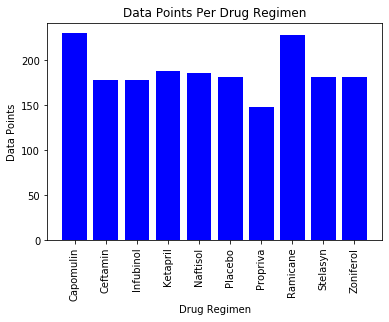

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen = combined_clean.groupby(['Drug Regimen'])
data_points = regimen['Tumor Volume (mm3)'].count()
regimen_count = pd.DataFrame({'Data Points': data_points})
regimen_count_plot = plt.bar(regimen_count.index.values, regimen_count['Data Points'], color = 'b', align = 'center')
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = 90)
plt.show()

## Pie Plots

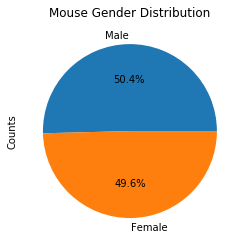

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_df = combined_clean.loc[combined_clean["Sex"] == 'Male', :]
male = male_df['Mouse ID'].nunique()
female_df = combined_clean.loc[combined_clean["Sex"] == 'Female', :]
female = female_df['Mouse ID'].nunique()
genders = pd.DataFrame({'Gender':['Male', 'Female'], 'Counts':[male, female]}).set_index('Gender')
gender_pandas = genders.plot(kind = 'pie', y = 'Counts', autopct='%1.1f%%', legend = False, title = "Mouse Gender Distribution")

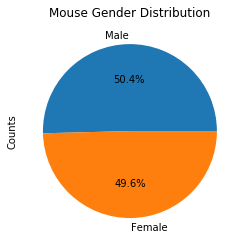

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = plt.pie(genders['Counts'], labels = genders.index.values, autopct='%1.1f%%')
gender_pyplot = plt.title("Mouse Gender Distribution")
gender_pyplot = plt.ylabel("Counts")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
capomulin_clean = combined_clean.loc[combined_clean['Drug Regimen'] == 'Capomulin', :]
capomulin_final = capomulin_clean.groupby('Mouse ID').nth(-1)['Tumor Volume (mm3)']
#Ramicane
ramicane_clean = combined_clean.loc[combined_clean['Drug Regimen'] == 'Ramicane', :]
ramicane_final = ramicane_clean.groupby('Mouse ID').nth(-1)['Tumor Volume (mm3)']
#Infubinol
infubinol_clean = combined_clean.loc[combined_clean['Drug Regimen'] == 'Infubinol', :]
infubinol_final = infubinol_clean.groupby('Mouse ID').nth(-1)['Tumor Volume (mm3)']
#Ceftamin
ceftamin_clean = combined_clean.loc[combined_clean['Drug Regimen'] == 'Ceftamin', :]
ceftamin_final = ceftamin_clean.groupby('Mouse ID').nth(-1)['Tumor Volume (mm3)']

all_final = pd.DataFrame({'Capomulin': capomulin_final, 'Ramicane': ramicane_final, 
                          'Infubinol': infubinol_final, 'Ceftamin': ceftamin_final},
                         columns = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
drug_list = all_final.keys()

for drug in drug_list:
    quartiles = all_final[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The interquartile range of tumor volumes for {drug} is: {round(iqr, 2)} mm3")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Volumes below {round(lower_bound, 2)} mm3 or above {round(upper_bound,2)} mm3 could be outliers for {drug}.")
    if (all_final[drug].min() < lower_bound) | (all_final[drug].max() > upper_bound):
        print(f'These values look like they could be outliers in the dataset for {drug}:')
        for value in all_final[drug]:
            if value < lower_bound:
                print(f"\t{round(value,2)} mm3 is less than the lower bound of {round(lower_bound, 2)} mm3 for the {drug} dataset.")
            elif value > upper_bound:
                print(f"\t{round(value,2)} mm3 is greater than the upper bound of {round(upper_bound, 2)} mm3 for the {drug} dataset.")
    else:
        print(f'There do not appear to be any outliers for {drug}.')
    print("-----------")

The interquartile range of tumor volumes for Capomulin is: 7.78 mm3
Volumes below 20.7 mm3 or above 51.83 mm3 could be outliers for Capomulin.
There do not appear to be any outliers for Capomulin.
-----------
The interquartile range of tumor volumes for Ramicane is: 9.1 mm3
Volumes below 17.91 mm3 or above 54.31 mm3 could be outliers for Ramicane.
There do not appear to be any outliers for Ramicane.
-----------
The interquartile range of tumor volumes for Infubinol is: 11.48 mm3
Volumes below 36.83 mm3 or above 82.74 mm3 could be outliers for Infubinol.
These values look like they could be outliers in the dataset for Infubinol:
	36.32 mm3 is less than the lower bound of 36.83 mm3 for the Infubinol dataset.
-----------
The interquartile range of tumor volumes for Ceftamin is: 15.58 mm3
Volumes below 25.36 mm3 or above 87.67 mm3 could be outliers for Ceftamin.
There do not appear to be any outliers for Ceftamin.
-----------


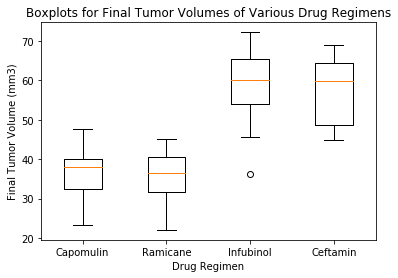

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_plot = plt.boxplot([all_final[str(drug_list[0])].dropna(), all_final[str(drug_list[1])].dropna(), 
                          all_final[str(drug_list[2])].dropna(), all_final[str(drug_list[3])].dropna()], 
                         labels = drug_list)
final_plot = plt.title("Boxplots for Final Tumor Volumes of Various Drug Regimens")
final_plot = plt.ylabel('Final Tumor Volume (mm3)')
final_plot = plt.xlabel('Drug Regimen')

## Line and Scatter Plots

Your choices for mice tested with Capomulin are ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']. Please enter the ID of the mouse to analyze (or type "stop" to cancel): s710


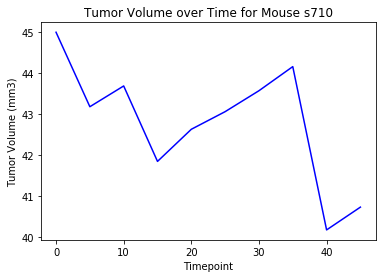

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
a = True
drug_choice = 'Capomulin'
choices_mice = combined_clean.loc[combined_clean['Drug Regimen'] == drug_choice]['Mouse ID'].unique()
while a == True:
    mouse_id = str(input(f'Your choices for mice tested with {drug_choice} are {choices_mice}. ' 
                 'Please enter the ID of the mouse to analyze (or type "stop" to cancel): '))
    if mouse_id in choices_mice:
        timepoints = combined_clean.loc[combined_clean['Mouse ID'] == mouse_id, :]['Timepoint']
        volume_over_time = combined_clean.loc[combined_clean['Mouse ID'] == mouse_id, :]['Tumor Volume (mm3)']
        id_plot = plt.plot(timepoints, volume_over_time, color = 'blue')
        id_plot = plt.title(f'Tumor Volume over Time for Mouse {mouse_id}')
        id_plot = plt.ylabel("Tumor Volume (mm3)")
        id_plot = plt.xlabel("Timepoint")
        a = False
    elif mouse_id == 'stop':
        print('Query cancelled')
        a = False
    else:
        print(f'{mouse_id} was not recognized as a mouse treated with {drug_choice}.')

The correlation coefficient (r-squared) for the two factors is 0.84.


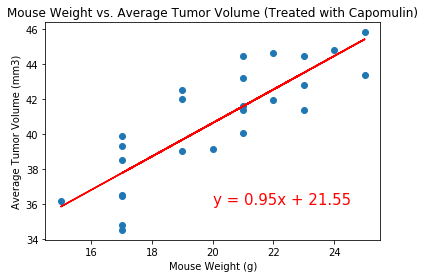

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_choice = 'Capomulin'
data = combined_clean.loc[combined_clean['Drug Regimen'] == drug_choice]
data_grouped = data.groupby('Mouse ID')
weights = data_grouped['Weight (g)'].mean()
volumes = data_grouped['Tumor Volume (mm3)'].mean()

plot = plt.scatter(weights, volumes)
plot = plt.title(f"Mouse Weight vs. Average Tumor Volume (Treated with {drug_choice})")
plot = plt.ylabel('Average Tumor Volume (mm3)')
plot = plt.xlabel('Mouse Weight (g)')

#Finding and plotting the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, volumes)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot = plt.plot(weights,regress_values,"r-")
plot = plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
print(f"The correlation coefficient (r-squared) for the two factors is {round(rvalue,2)}.")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#See previous cell for linear regression.  Another method to calculate the r-squared value is shown below.

correlation = st.pearsonr(weights, volumes)
print(f"The correlation coefficient for the two factors is {round(correlation[0],2)}.")

The correlation coefficient for the two factors is 0.84.
